# Task 2: Descriptive analysis

## Preperation

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# import Dataframes with cleaned data independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))
merged_charging_weather_data = pd.read_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))

## a - Temporal patterns

Goal is to show the variation of the chariging sessions between day, week and season.
Lets break down the taks:
1. Create features for time
2. bring them into the rigt order
3. Create bar plots 

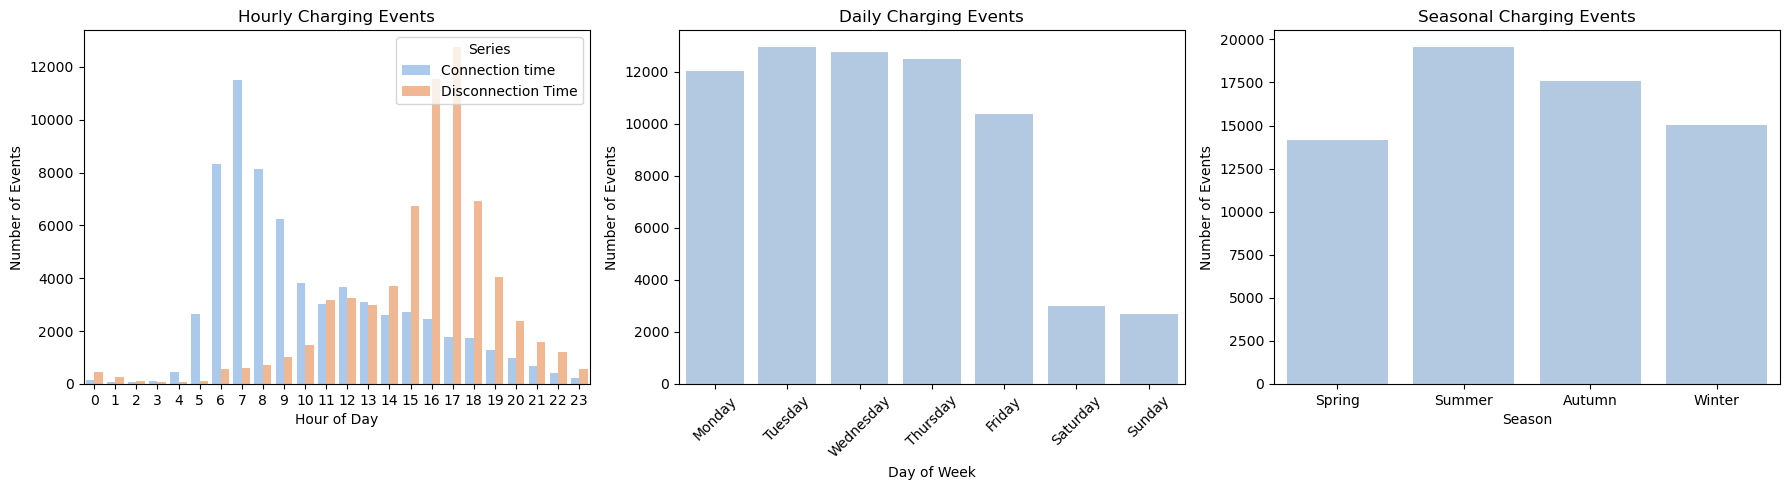

In [2]:
# Task (a): Temporal Patterns and Seasonality
# Extract time-based features

charging_data_cleaned['hourstart'] = charging_data_cleaned['connectionTime'].dt.hour
charging_data_cleaned['hourend'] = charging_data_cleaned['disconnectTime'].dt.hour

charging_data_cleaned['day_of_week'] = charging_data_cleaned['connectionTime'].dt.day_name()
charging_data_cleaned['month'] = charging_data_cleaned['connectionTime'].dt.month
charging_data_cleaned['season'] = charging_data_cleaned['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Autumn'
)

# Aggregation for patterns
hourly_pattern_start = charging_data_cleaned.groupby('hourstart').size()
hourly_pattern_end = charging_data_cleaned.groupby('hourend').size()

daily_pattern = charging_data_cleaned.groupby('day_of_week').size()
seasonal_pattern = charging_data_cleaned.groupby('season').size()

# Sort days for correct visualization order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Spring', 'Summer', 'Autumn', 'Winter']

daily_pattern = daily_pattern.reindex(day_order)
seasonal_pattern = seasonal_pattern.reindex(month_order)

df = pd.DataFrame({
    'Hour': hourly_pattern_start.index,
    'Connection time': hourly_pattern_start.values,
    'Disconnection Time': hourly_pattern_end.values
}).melt(id_vars='Hour', var_name='Series', value_name='Events')

# Plot
plt.figure(figsize=(18, 5))

# Erster Plot: Hourly Charging Events
plt.subplot(1, 3, 1)  # Subplot 1
sns.barplot(data=df, x='Hour', y='Events', hue='Series', palette='pastel')
plt.title('Hourly Charging Events')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Series', loc='upper right')

# Zweiter Plot: Daily Charging Events
plt.subplot(1, 3, 2)  # Subplot 2
sns.barplot(x=daily_pattern.index, y=daily_pattern.values, color='#abc9ea')
plt.title('Daily Charging Events')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Dritter Plot: Seasonal Charging Events
plt.subplot(1, 3, 3)  # Subplot 3
sns.barplot(x=seasonal_pattern.index, y=seasonal_pattern.values, color='#abc9ea')
plt.title('Seasonal Charging Events')
plt.xlabel('Season')
plt.ylabel('Number of Events')

# Layout anpassen, damit alles nebeneinander bleibt
plt.tight_layout()
plt.show()

## ToDo: relative Values



## b - Key Performance Indicators

Goal is to define 3 KPIs for a dashboard and visualize them over time

1. Define KPIs, e.g.:

    Utilization Rate: Percentage of total available time a charging station is in use.
    -> Highlights how effectively the charging stations are being utilized.

    -> Check

    Idle Time Percentage: Proportion of time stations are occupied but not actively charging.
    -> Identifies inefficiencies and opportunities to improve turnover.

    Peak Hour Utilization: Number of charging sessions started during the busiest hour.
    -> Shows when demand is highest, helping in capacity planning and pricing strategies.

    Other Alternatives:
    kWh delivered: Total sum of kWh delivered in an hour
    
    Average Charging Speed (kWh/hour): Average rate of energy delivery during charging sessions.
    -> Helps monitor equipment performance and customer experience.

    Session Duration: Average time per charging session.
    -> Provides insights into user behavior and informs station scheduling.

    Revenue per kWh (if pricing data available): Average revenue generated per unit of energy delivered. -> No pricing data avalible
    -> Directly ties operational efficiency to financial performance.

    Sessions per Charger: Average number of charging sessions per station over time. -> not good
    -> Measures the distribution of usage across stations and identifies underperforming assets.

    Peak-to-Average Load Ratio: Ratio of peak energy demand to average demand.
    -> Helps identify stress periods on the grid and the need for scaling infrastructure.

    Repeat Customer Ratio: Percentage of unique users returning for multiple sessions.
    -> Indicates customer loyalty and satisfaction with the charging hub.

    Weather Impact Correlation: Relationship between weather (e.g., temperature, rain) and charging demand.
    -> Provides context for fluctuations in usage, enabling better forecasting




2. Combinne KPIs into an Dataframe
3. Plot the KPIs over time

C:\Users\paull\AppData\Local\Temp\ipykernel_26568\2797206305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_data_2019['date'] = charging_data_2019['connectionTime'].dt.date
C:\Users\paull\AppData\Local\Temp\ipykernel_26568\2797206305.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_data_2019['usage_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
C:\Users\paull\AppData\Local\Temp\ipykernel_26568\2797206305.py:17: Set

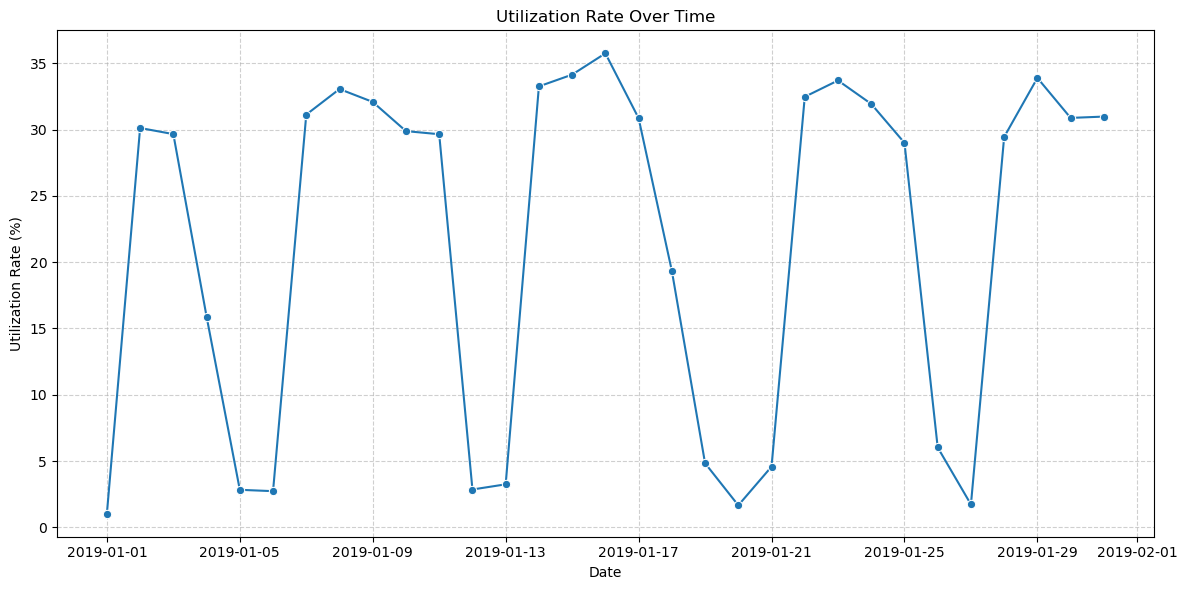

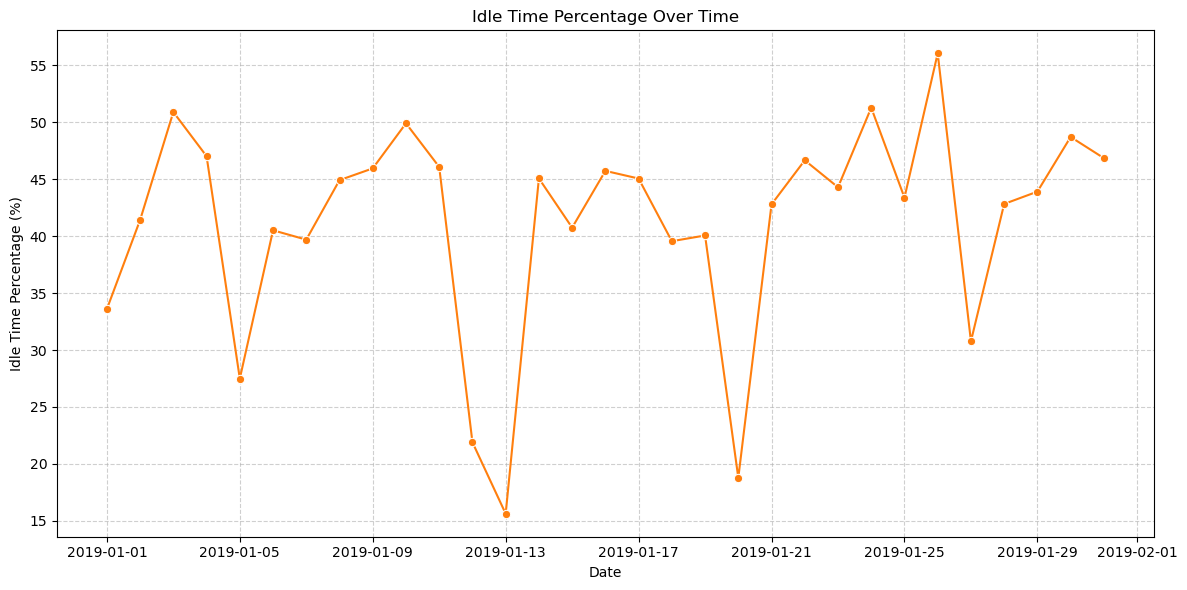

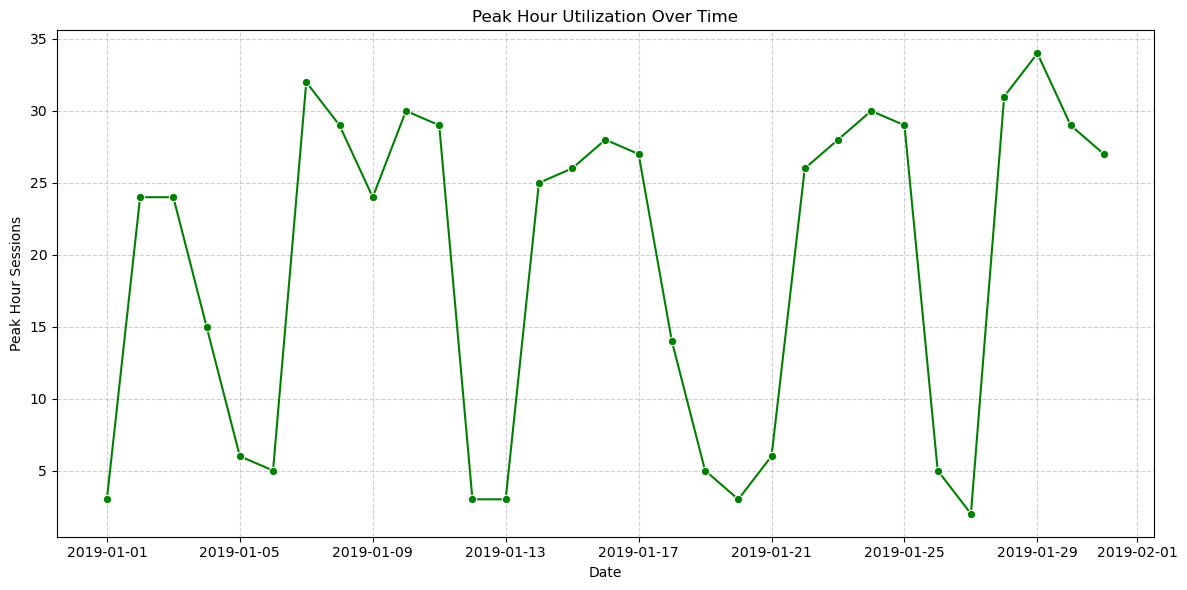

In [3]:
# Task (b): Key Performance Indicators (KPIs)
# Define KPIs
charging_data_2019 = charging_data_cleaned[
    (charging_data_cleaned['connectionTime'].dt.year == 2019) &
    (charging_data_cleaned['connectionTime'].dt.month == 1)
]

# Schritt 1: Spalten vorbereiten
charging_data_2019['date'] = charging_data_2019['connectionTime'].dt.date

# Gesamtzeit im Betrachtungszeitraum (pro Tag)
total_stations = charging_data_2019['stationID'].nunique()
total_minutes_per_day = total_stations * 24 * 60

# Gesamtzeit, Ladezeit und Leerlaufzeit berechnen
charging_data_2019['usage_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
charging_data_2019['charging_minutes'] = (charging_data_2019['doneChargingTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
charging_data_2019['idle_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['doneChargingTime']).dt.total_seconds() / 60

# Aggregation nach Datum
daily_aggregates = charging_data_2019.groupby('date').agg(
    used_minutes=('usage_minutes', 'sum'),
    charging_minutes=('charging_minutes', 'sum'),
    idle_minutes=('idle_minutes', 'sum'),
    peak_hour_sessions=('id', lambda x: x.groupby(charging_data_2019['connectionTime'].dt.hour).count().max())
)

# KPIs berechnen
daily_aggregates['utilization_rate'] = (daily_aggregates['used_minutes'] / total_minutes_per_day) * 100
daily_aggregates['idle_time_percentage'] = (daily_aggregates['idle_minutes'] / daily_aggregates['used_minutes']) * 100
daily_aggregates['peak_hour_utilization'] = daily_aggregates['peak_hour_sessions']

# Schritt 2: DataFrame für die Zeitreihen-Analyse vorbereiten
kpi_df = daily_aggregates.reset_index()[['date', 'utilization_rate', 'idle_time_percentage', 'peak_hour_utilization']]

# Plot 1: Utilization Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='date', y='utilization_rate', marker='o', color='tab:blue')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Idle Time Percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='date', y='idle_time_percentage', marker='o', color='tab:orange')
plt.title('Idle Time Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Idle Time Percentage (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 3: Peak Hour Utilization
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='date', y='peak_hour_utilization', marker='o', color='green')
plt.title('Peak Hour Utilization Over Time')
plt.xlabel('Date')
plt.ylabel('Peak Hour Sessions')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## ToDo hourly
## show values


## c - Site Characteristics

        Avg_kWh_Delivered  Total_kWh_Delivered  Total_Sessions  Unique_Users  \
siteID                                                                         
1               14.063273        492608.311782           35028           523   
2                9.251384        289605.331753           31304           572   

        Avg_Charging_Duration  Sessions_per_User  
siteID                                            
1                    6.843233          66.975143  
2                    5.468427          54.727273  


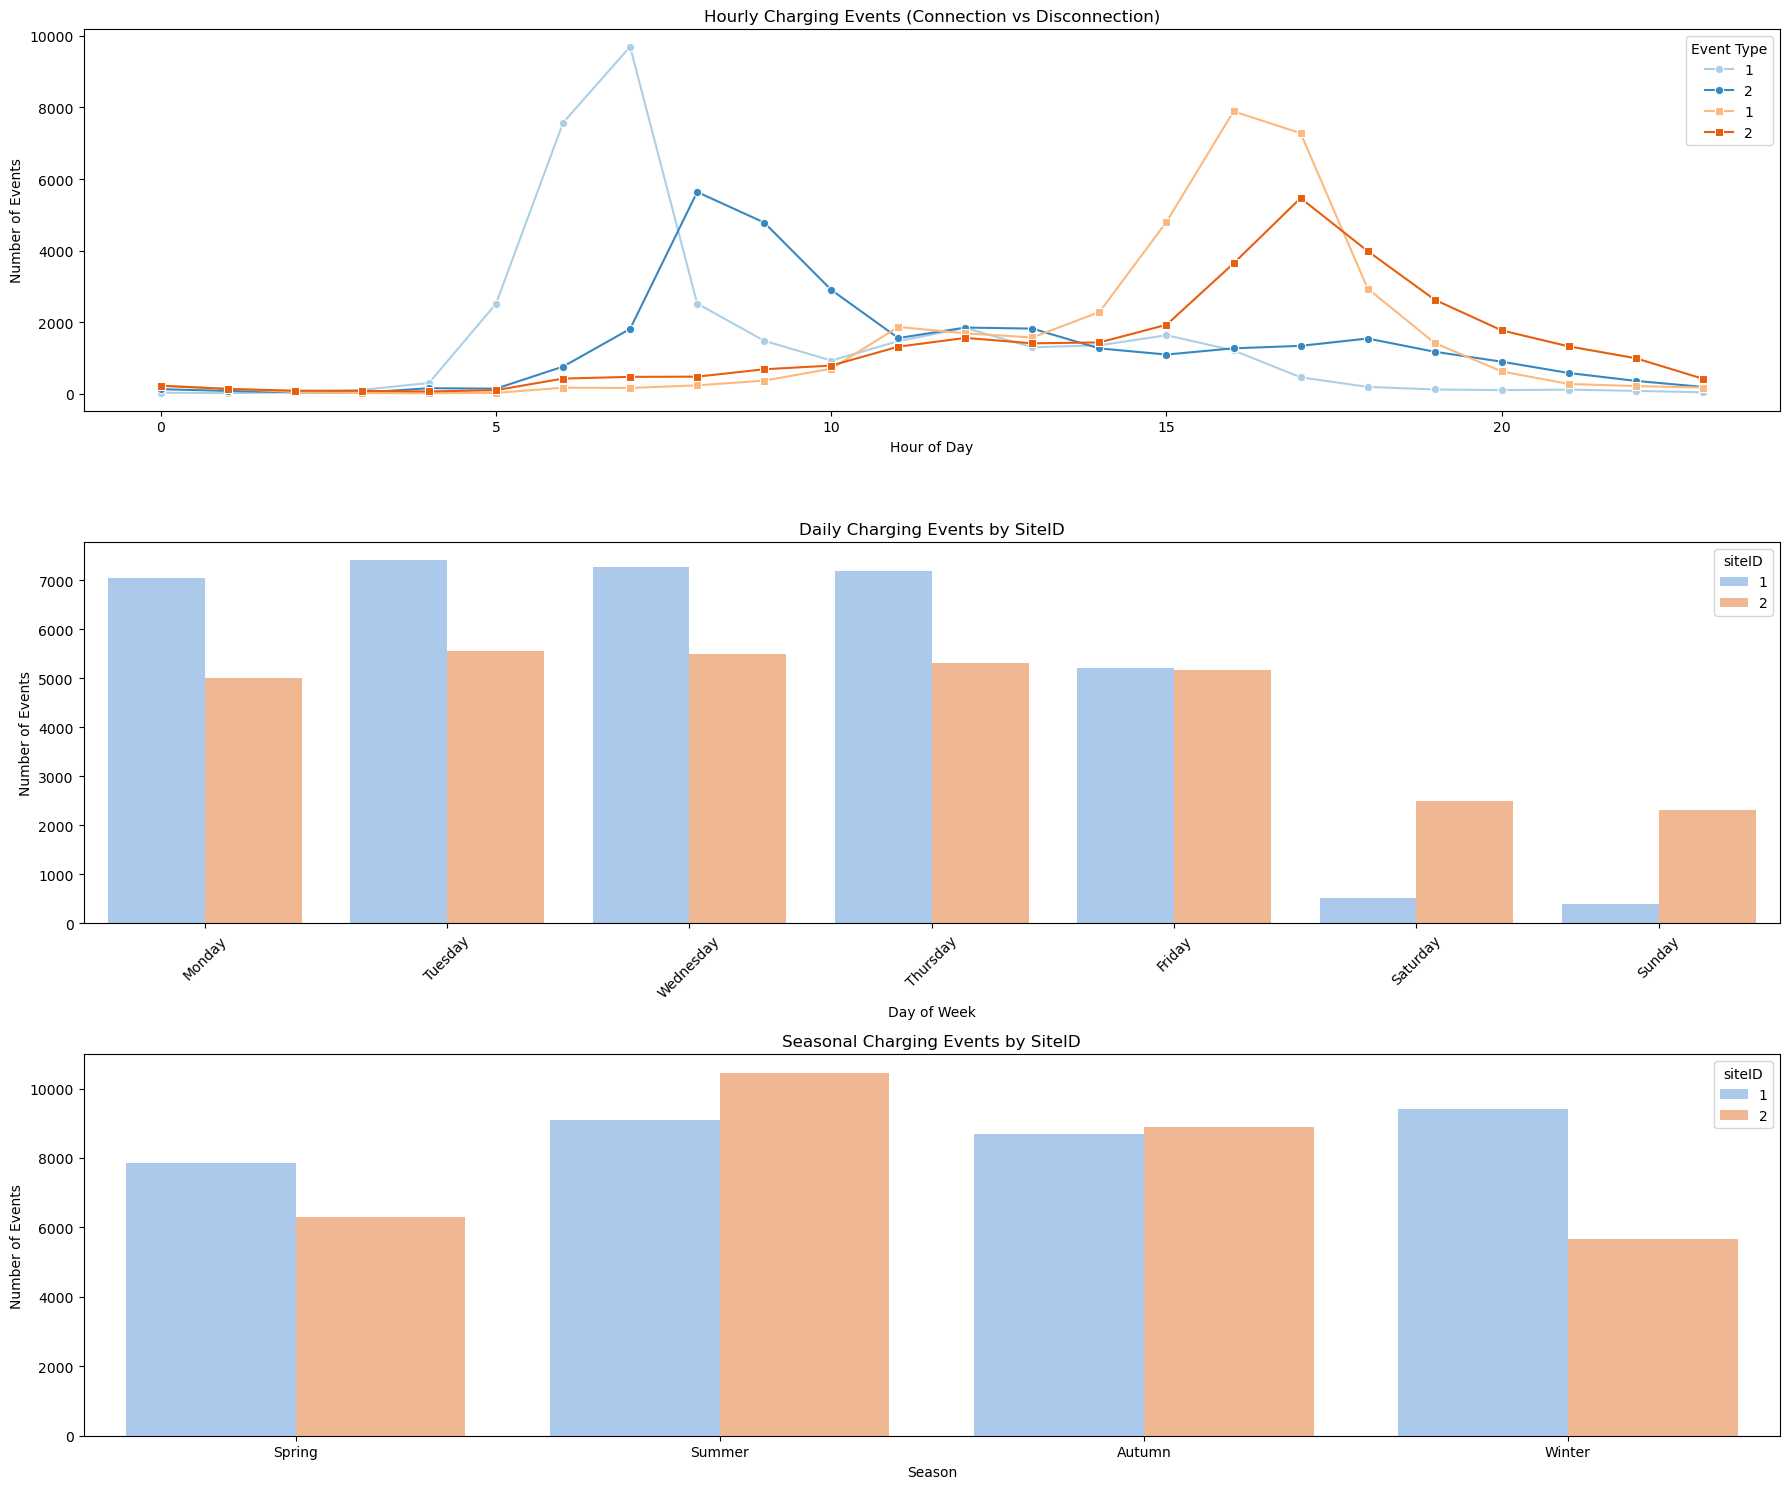

In [4]:

# Berechnung der durchschnittlichen Ladedauer pro Site (disconnectTime - connectionTime)
charging_data_cleaned['Charging_Duration'] = (
    charging_data_cleaned['disconnectTime'] - charging_data_cleaned['connectionTime']
).dt.total_seconds() / 3600  # Umwandlung in Stunden

# Aggregation der Daten nach siteID
site_data = charging_data_cleaned.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'sum', 'count'],
    'userID': 'nunique',
    'Charging_Duration': 'mean'  # Berechnung der durchschnittlichen Ladedauer
})

# Spalten umbenennen
site_data.columns = ['Avg_kWh_Delivered', 'Total_kWh_Delivered', 'Total_Sessions', 'Unique_Users', 'Avg_Charging_Duration']
site_data['Sessions_per_User'] = site_data['Total_Sessions'] / site_data['Unique_Users']

# Sortierung nach der Anzahl der Sitzungen
site_data = site_data.sort_values('Total_Sessions', ascending=False)

# Ergebnis anzeigen
print(site_data)


# compare time related patterns
# Aggregation nach siteID und anderen Merkmalen
hourly_pattern_site = charging_data_cleaned.groupby(['hourstart', 'siteID']).size().reset_index(name='Events')
hourly_pattern_end_site = charging_data_cleaned.groupby(['hourend', 'siteID']).size().reset_index(name='Events')

daily_pattern_site = charging_data_cleaned.groupby(['day_of_week', 'siteID']).size().reset_index(name='Events')
seasonal_pattern_site = charging_data_cleaned.groupby(['season', 'siteID']).size().reset_index(name='Events')

# Kombiniere Start- und Endzeit-Daten für die Visualisierung
hourly_combined = pd.concat([
    hourly_pattern_site.rename(columns={'hourstart': 'Hour', 'Events': 'Events'}).assign(Type='Connection Time'),
    hourly_pattern_end_site.rename(columns={'hourend': 'Hour', 'Events': 'Events'}).assign(Type='Disconnection Time')
])

# Plot
plt.figure(figsize=(18, 15))

# Erster Plot: Hourly Charging Events by SiteID
plt.subplot(3, 1, 1)  # Subplot 1

sns.lineplot(
    data=hourly_combined[hourly_combined['Type'] == 'Connection Time'],
    x='Hour', 
    y='Events', 
    hue='siteID', 
    palette='Blues', 
    marker='o'
)

sns.lineplot(
    data=hourly_combined[hourly_combined['Type'] == 'Disconnection Time'],
    x='Hour', 
    y='Events', 
    hue='siteID', 
    palette='Oranges', 
    marker='s'
)

plt.title('Hourly Charging Events (Connection vs Disconnection)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Event Type', loc='upper right')

# Zweiter Plot: Daily Charging Events nach siteID
plt.subplot(3, 1, 2)  # Subplot 2
sns.barplot(data=daily_pattern_site, x='day_of_week', y='Events', hue='siteID', palette='pastel', order=day_order)
plt.title('Daily Charging Events by SiteID')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Dritter Plot: Seasonal Charging Events nach siteID
plt.subplot(3, 1, 3)  # Subplot 3
sns.barplot(data=seasonal_pattern_site, x='season', y='Events', hue='siteID', palette='pastel', order=month_order)
plt.title('Seasonal Charging Events by SiteID')
plt.xlabel('Season')
plt.ylabel('Number of Events')

# Layout anpassen
plt.tight_layout()
plt.show()

## ToDo: relative values
## split first plot
## weather

What the data suggestes:
1. site 1 seems to be used in a business conext. 
    - The connection an disconnection times show a 9 to 5 pattern
    - The site is much more used on weekdays. 
    - There is an equal distribution between seasons
2. site 2 seems to be used in free time context (e.g. a shopping mal)
    - The connection time is later on average
    - There are much more connections on weekends
    - The site is mostly used in Summer